In this notebook, we look at tracks in the last plate of the emulsion detector and extrapolate their tracks from their last coordinates (x, y, z) to a plate 4cm away (distance to the IFT). We do this two ways: 1) use base-track angle of the last segment 2) use track angle using positions of the first and last segments

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
import mpl_scatter_density

In [3]:
# pre-process using PANDAS
area1_1 = pd.read_csv("chk_trks_area1-1_20220203.txt", sep='\s+', header=None)
area1_2 = pd.read_csv("chk_trks_area1-2_20220203.txt", sep='\s+', header=None)
area1_3 = pd.read_csv("chk_trks_area1-3_20220203.txt", sep='\s+', header=None)
area1_4 = pd.read_csv("chk_trks_area1-4_20220203.txt", sep='\s+', header=None)

combine = area1_1.append(area1_2, ignore_index=True)
combine = combine.append(area1_3, ignore_index=True)

emulsion = combine.append(area1_4, ignore_index=True)
emulsion.columns = ["t->ID", "plate_first", "plate_last", "x_last", "y_last", "z_last", 
                    "tx_last", "ty_last", "tx_pos", "ty_pos", "t->N()", "t->Npl()"]

In [4]:
# we want to match these emulstion tracks with tracks in the IFT
# IFT sits adjacent to the emulsion. For now we'll look at tracks
# that end on the last plate (plate closest to the IFT)
emulsion_20 = emulsion[emulsion["plate_last"] == 20]

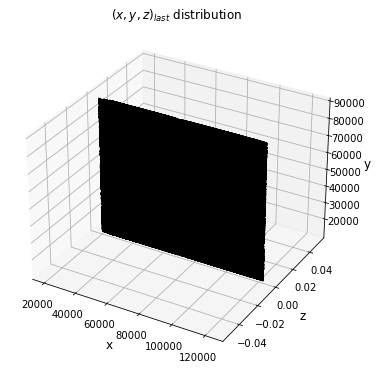

In [5]:
plt.rcParams["figure.figsize"] = [15/3, 20/3]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
x, y, z = emulsion_20['x_last'], emulsion_20['y_last'], emulsion_20['z_last']
#ax.scatter(z, y, x, c='red', s=100)
ax.plot(x, z, y,color='black')
ax.set_xlabel("x", size=12)
ax.set_ylabel("z", size=12)
ax.set_zlabel("y", size=12)
ax.set_title("$(x,y,z)_{last}$ distribution", size=12)
#file_name = 'plots/xyz_dist.png'
#plt.savefig(file_name,bbox_inches='tight',facecolor='w')
plt.show()

Looking at the x,y,z plot above, we want to extrapolate each points to 4cm forward

In [6]:
# calulate (x,y,z) coordicates for each tracks 4cm away using (x_last,y_last,z_last) 
# and (tx_last, ty_last) & (tx_pos, ty_pos)
def extrapolate_point(data, angle):
    z_new = 40000  # (in mu_meters, gap from emulsion to IFT)
    tx=0
    ty=0
    
    if angle == 0:
        tx = data["tx_last"]
        ty = data["ty_last"]
    if angle == 1:
        tx = data["tx_pos"]
        ty = data["ty_pos"]    

    x_last = data["x_last"]
    y_last = data["y_last"]
    z_last = data["z_last"]
    
    x_new = tx*(z_new-z_last) + x_last
    y_new = ty*(z_new-z_last) + y_last
    
    return [x_new, y_new]

In [7]:
x_mean = np.round(np.mean(emulsion_20["x_last"]),4)
y_mean = np.round(np.mean(emulsion_20["y_last"]),4)

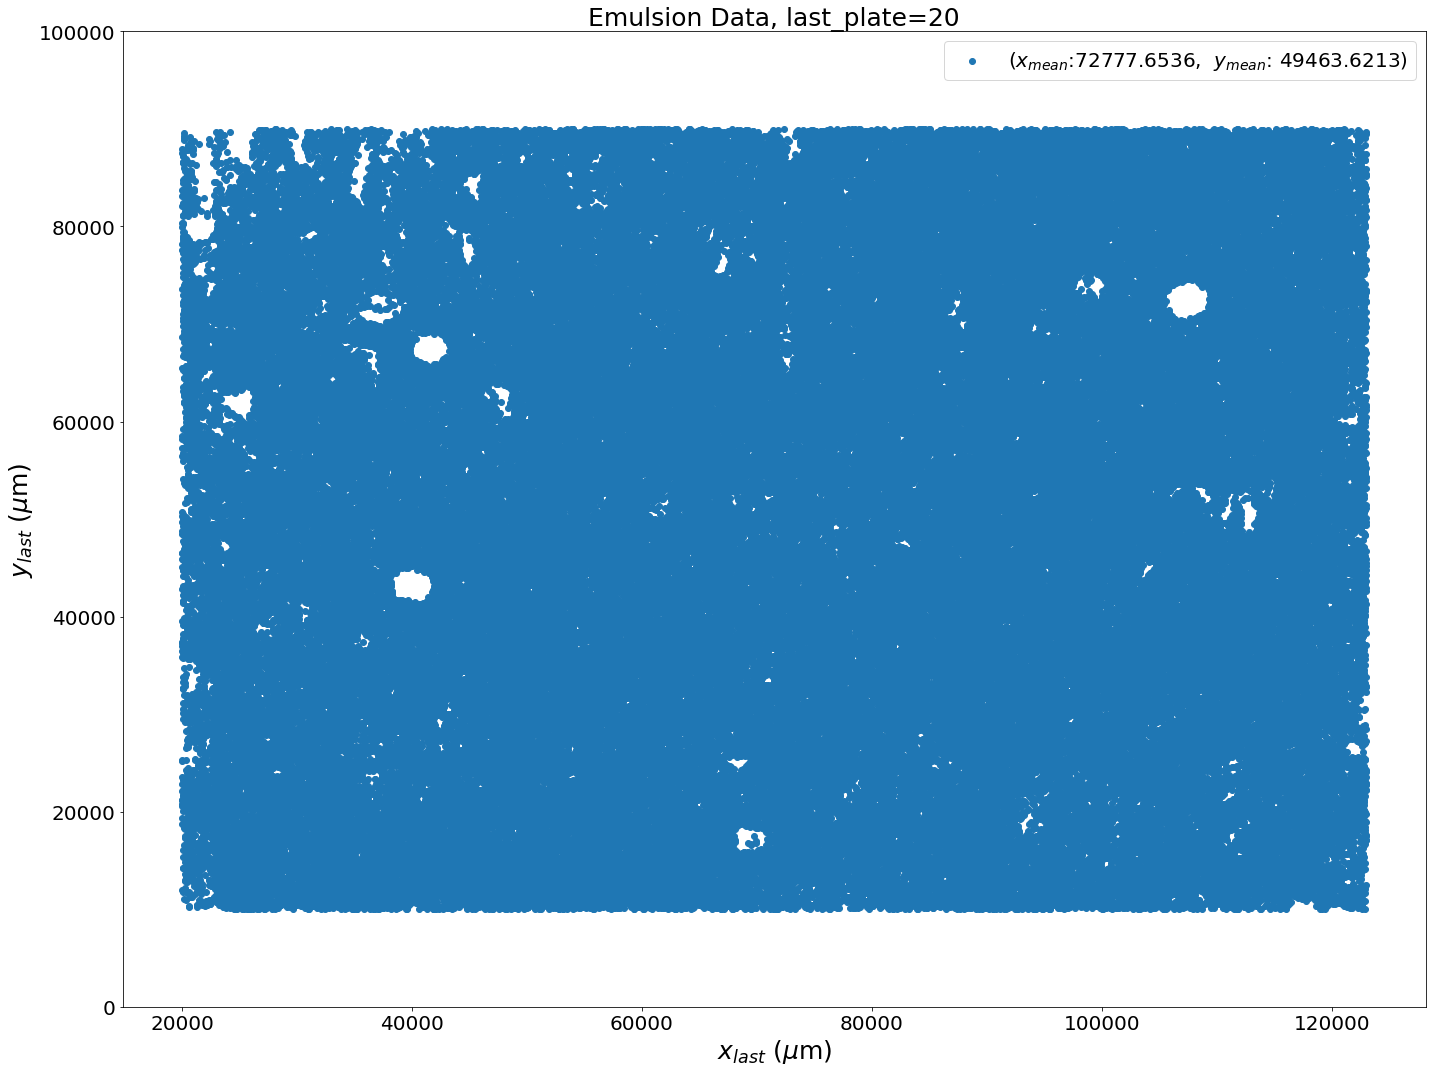

In [8]:
fig = plt.figure(figsize=(20,15))
plt.scatter(emulsion_20["x_last"], emulsion_20["y_last"], label="($x_{mean}$:" + str(x_mean) + ",  $y_{mean}$: " + str(y_mean) +")")
plt.title("Emulsion Data, last_plate=20",size=25)
plt.ylabel("$y_{last}$ ($\mu$m)",size=25)
plt.xlabel("$x_{last}$ ($\mu$m)",size=25)
#plt.xlim(130000,10000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.ylim(0, 100000)
file_name = 'report/x_y-dist.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

In [9]:
max(emulsion_20["y_last"])-min(emulsion_20["y_last"])


79999.5

### Extrapolate data

In [10]:
extrapolated_x = []
extrapolated_y = []

In [11]:
for i in range(0,len(emulsion_20)):
    extrapolated_x.append(float(np.array(extrapolate_point(emulsion_20.iloc[i], 0)[0])))
    extrapolated_y.append(float(np.array(extrapolate_point(emulsion_20.iloc[i], 0)[1])))

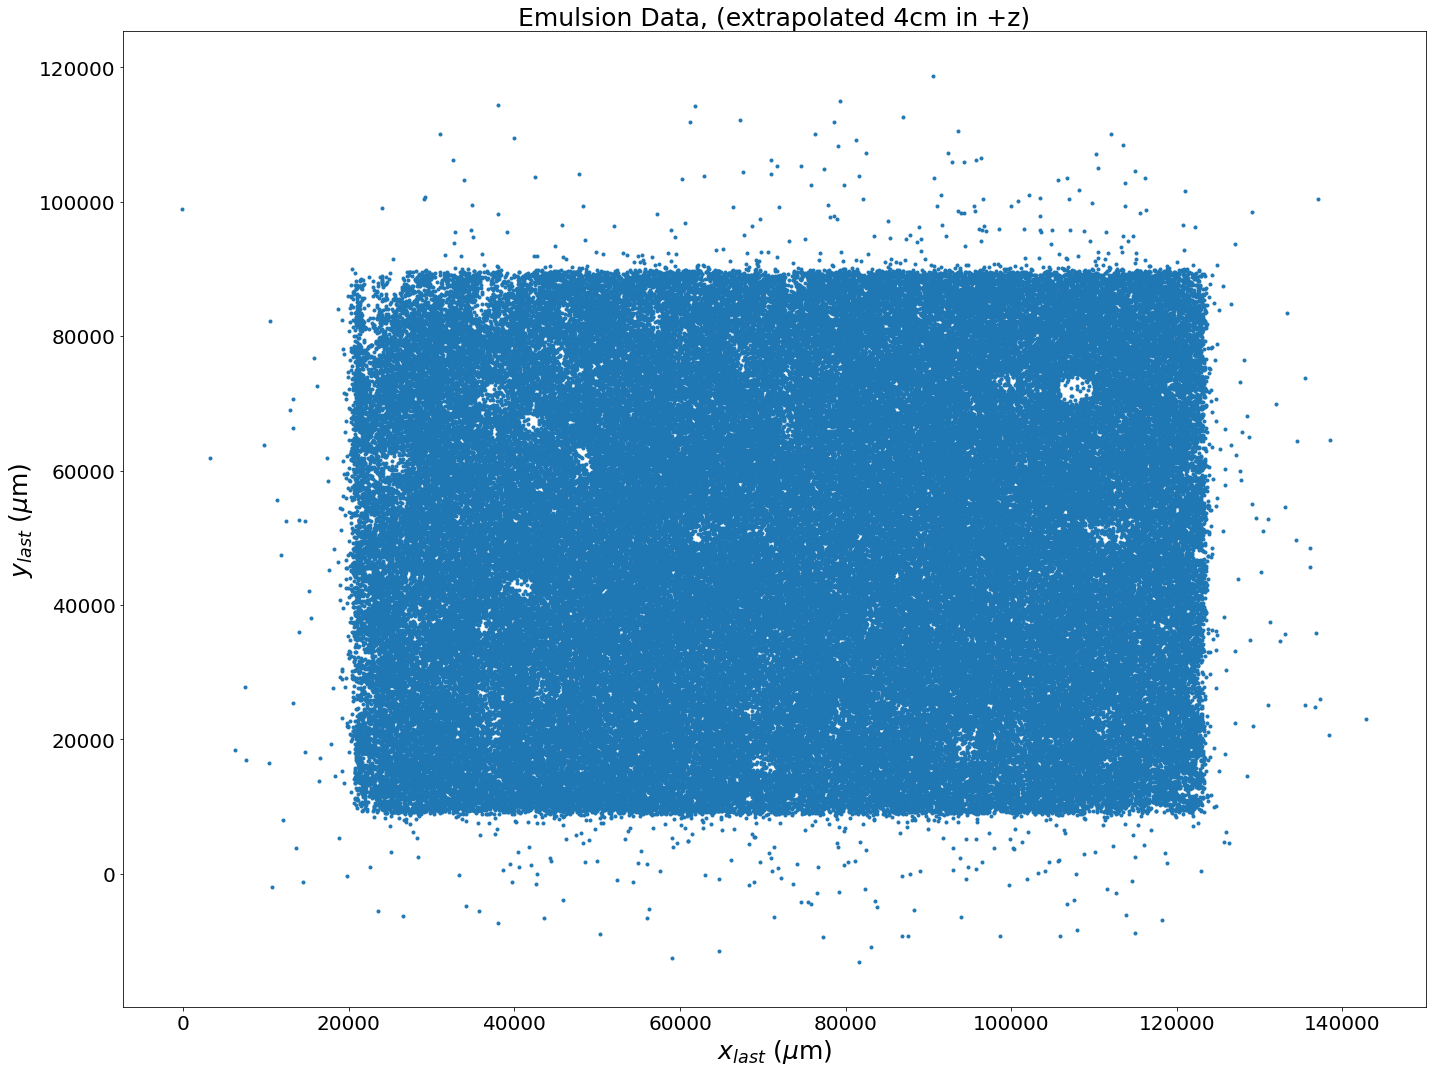

In [12]:
fig = plt.figure(figsize=(20,15))
plt.scatter(extrapolated_x, extrapolated_y,marker='.')
plt.title("Emulsion Data, (extrapolated 4cm in +z)",size=25)
plt.ylabel("$y_{last}$ ($\mu$m)",size=25)
plt.xlabel("$x_{last}$ ($\mu$m)",size=25)
#plt.xlim(130000,10000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.legend(fontsize=20)
#plt.ylim(0, 100000)
file_name = 'report/x_y-dist_extrapolated.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

## filter for low angles

In [13]:
filter_xmin = emulsion_20[abs(emulsion_20["tx_last"]) < 0.05]
filter_xmax = emulsion_20[abs(emulsion_20["tx_last"]) < 0.05]

filter_ymin = emulsion_20[abs(emulsion_20["ty_last"]) < 0.05]
filter_ymax = emulsion_20[abs(emulsion_20["ty_last"]) < 0.05]

combine = filter_xmin.append(filter_xmax, ignore_index=True)
combine = combine.append(filter_ymax, ignore_index=True)
combine = combine.append(filter_ymin, ignore_index=True)

low_tx_t = combine

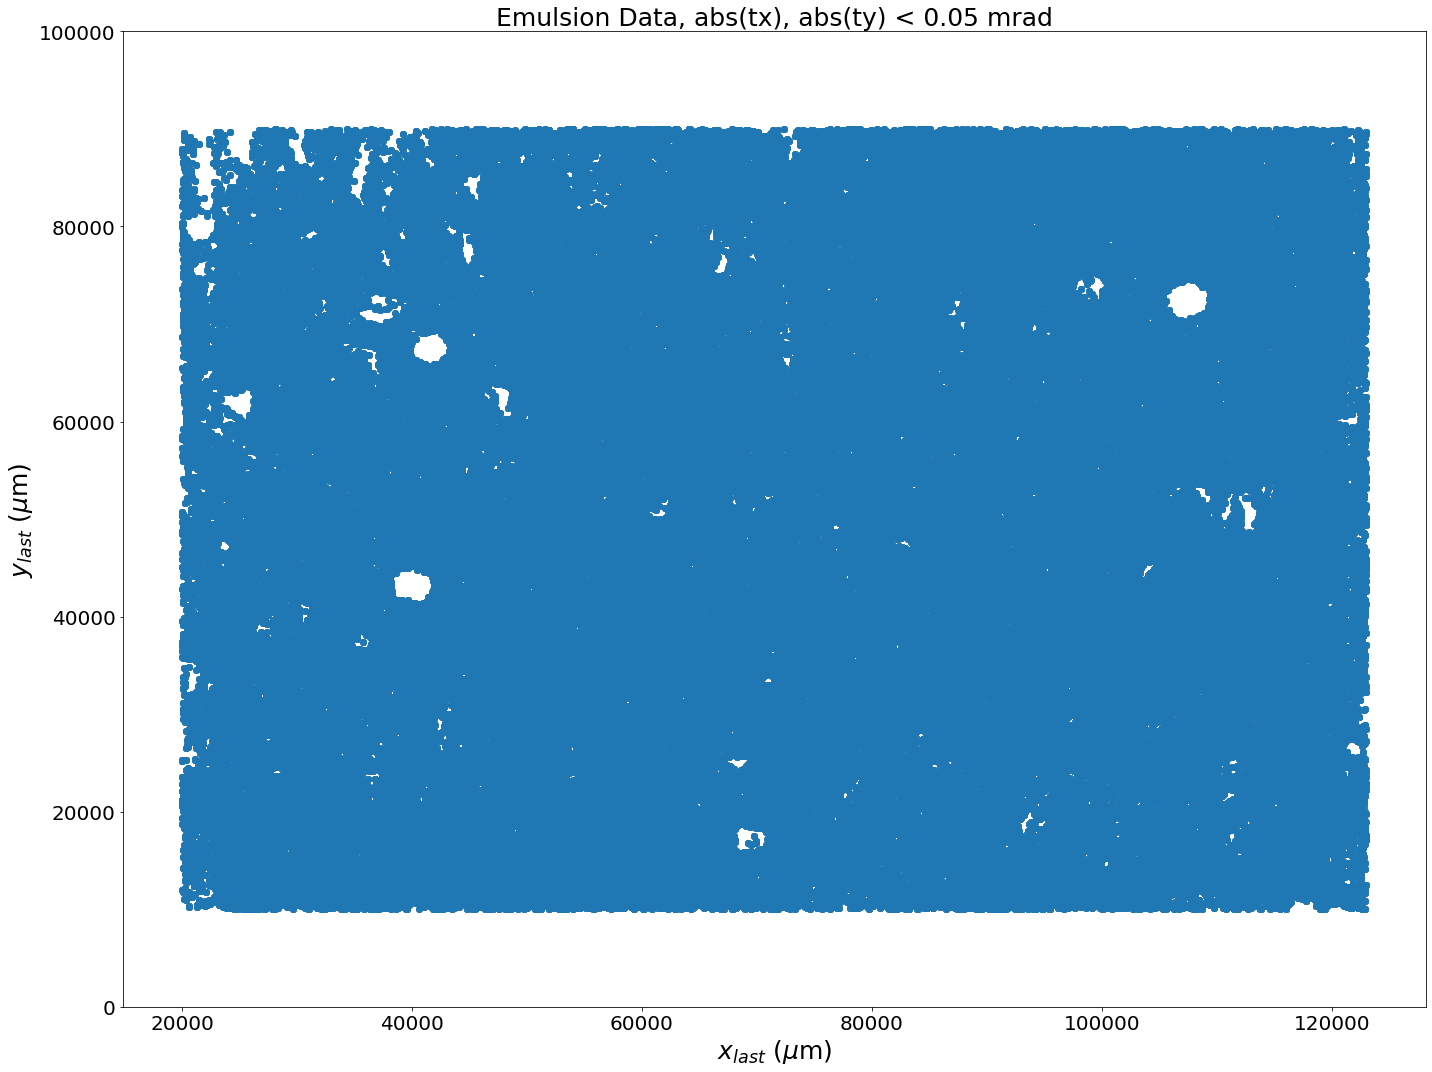

In [14]:
fig = plt.figure(figsize=(20,15))
plt.scatter(low_tx_t["x_last"], low_tx_t["y_last"])
plt.title("Emulsion Data, abs(tx), abs(ty) < 0.05 mrad",size=25)
plt.ylabel("$y_{last}$ ($\mu$m)",size=25)
plt.xlabel("$x_{last}$ ($\mu$m)",size=25)
#plt.xlim(130000,10000) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 100000)
file_name = 'report/x_y-dis-low_txty.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

In [15]:
len(low_tx_t)

641892

In [16]:
filter_xmin = emulsion_20[abs(emulsion_20["tx_last"]) > 0.1]
filter_xmax = emulsion_20[abs(emulsion_20["tx_last"]) > 0.1]

filter_ymin = emulsion_20[abs(emulsion_20["ty_last"]) > 0.1]
filter_ymax = emulsion_20[abs(emulsion_20["ty_last"]) > 0.1]

combine = filter_xmin.append(filter_xmax, ignore_index=True)
combine = combine.append(filter_ymax, ignore_index=True)
combine = combine.append(filter_ymin, ignore_index=True)

high_tx_t = combine

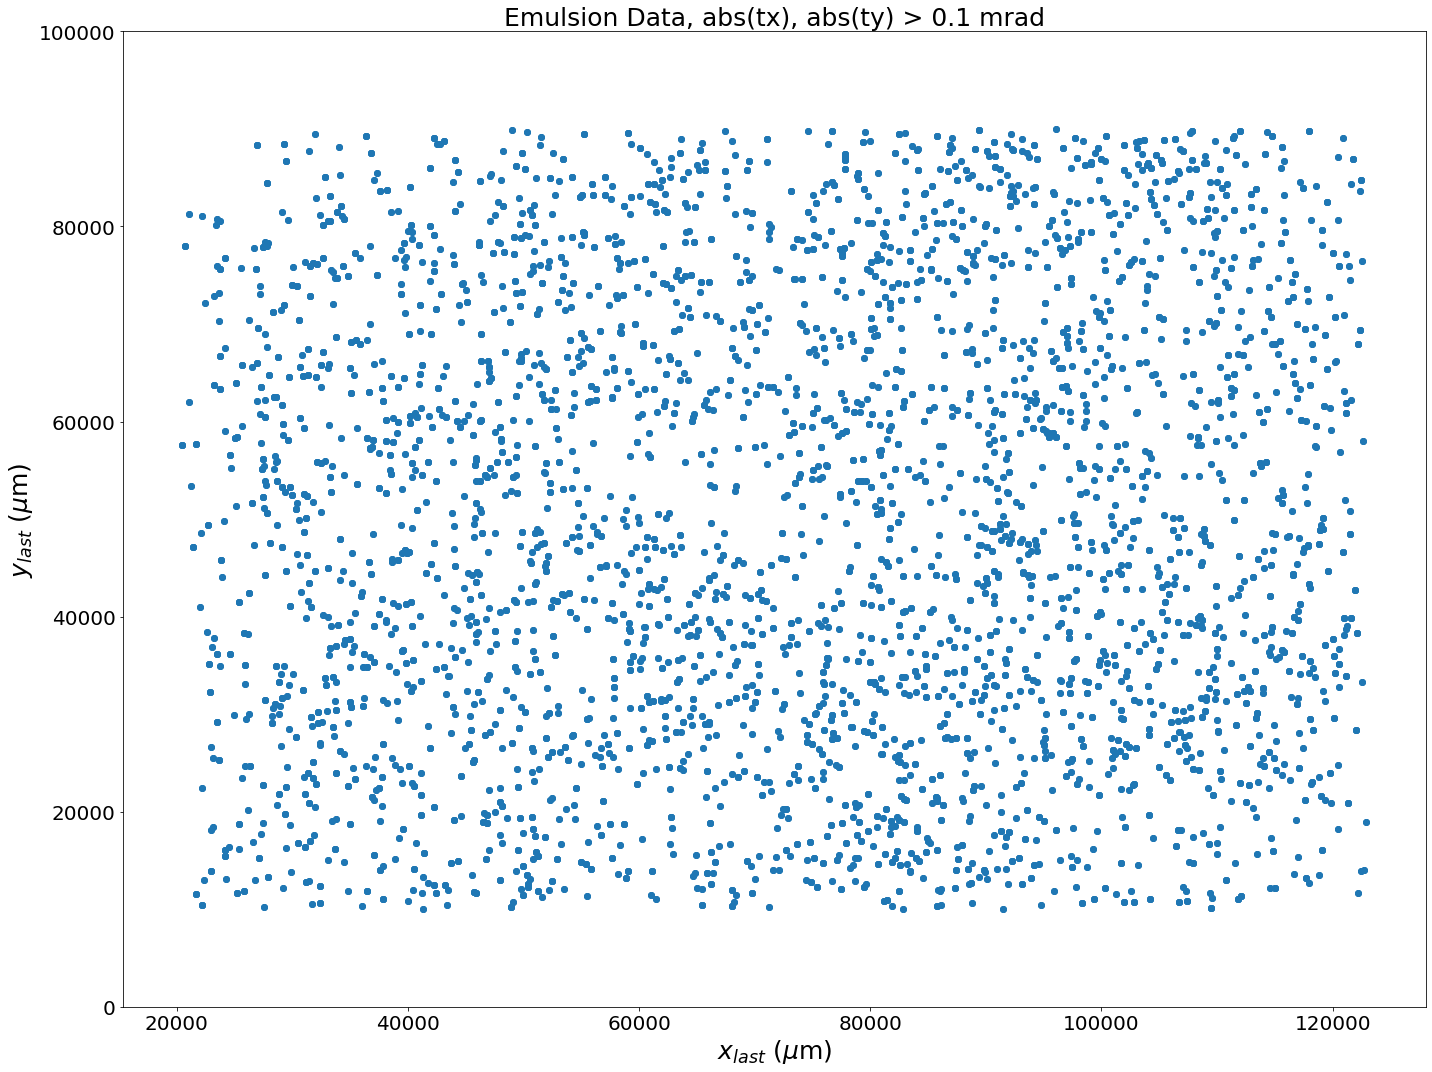

In [17]:
fig = plt.figure(figsize=(20,15))
plt.scatter(high_tx_t["x_last"], high_tx_t["y_last"])
plt.title("Emulsion Data, abs(tx), abs(ty) > 0.1 mrad",size=25)
plt.ylabel("$y_{last}$ ($\mu$m)",size=25)
plt.xlabel("$x_{last}$ ($\mu$m)",size=25)
#plt.xlim(130000,10000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 100000)
file_name = 'report/x_y-dis-high_txty.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

## extrpoalte high angles

In [18]:
extrapolated_x_higtx = []
extrapolated_y_highty = []

In [19]:
for i in range(0,len(high_tx_t)):
    extrapolated_x_higtx.append(float(np.array(extrapolate_point(high_tx_t.iloc[i], 0)[0])))
    extrapolated_y_highty.append(float(np.array(extrapolate_point(high_tx_t.iloc[i], 0)[1])))

In [20]:
fig = plt.figure(figsize=(20,15))
plt.scatter(extrapolated_x_higtx, extrapolated_y_highty)
plt.title("Emulsion Data, (extrapolated 4cm in +z), abs(tx), abs(ty) > 0.1 mrad ",size=25)
plt.ylabel("$y_{last}$ ($\mu$m)",size=25)
plt.xlabel("$x_{last}$ ($\mu$m)",size=25)
#plt.xlim(130000,10000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.legend(fontsize=20)
#plt.ylim(0, 100000)
file_name = 'report/x_y-dist_extrapolated_highTXty.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

In [21]:
fig = plt.figure(figsize=(20,15))
plt.hist(emulsion_20["tx_last"],bins=100,label="mean: " + str(np.round(np.mean(emulsion_20["tx_last"]),4)) + " mrad")
plt.title("tx distribution of emulsion",size=25)
plt.ylabel("count",size=25)
plt.xlabel("tx (mrad)",size=25)
#plt.xlim(130000,10000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
#plt.ylim(0, 100000)
file_name = 'report/tx.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')


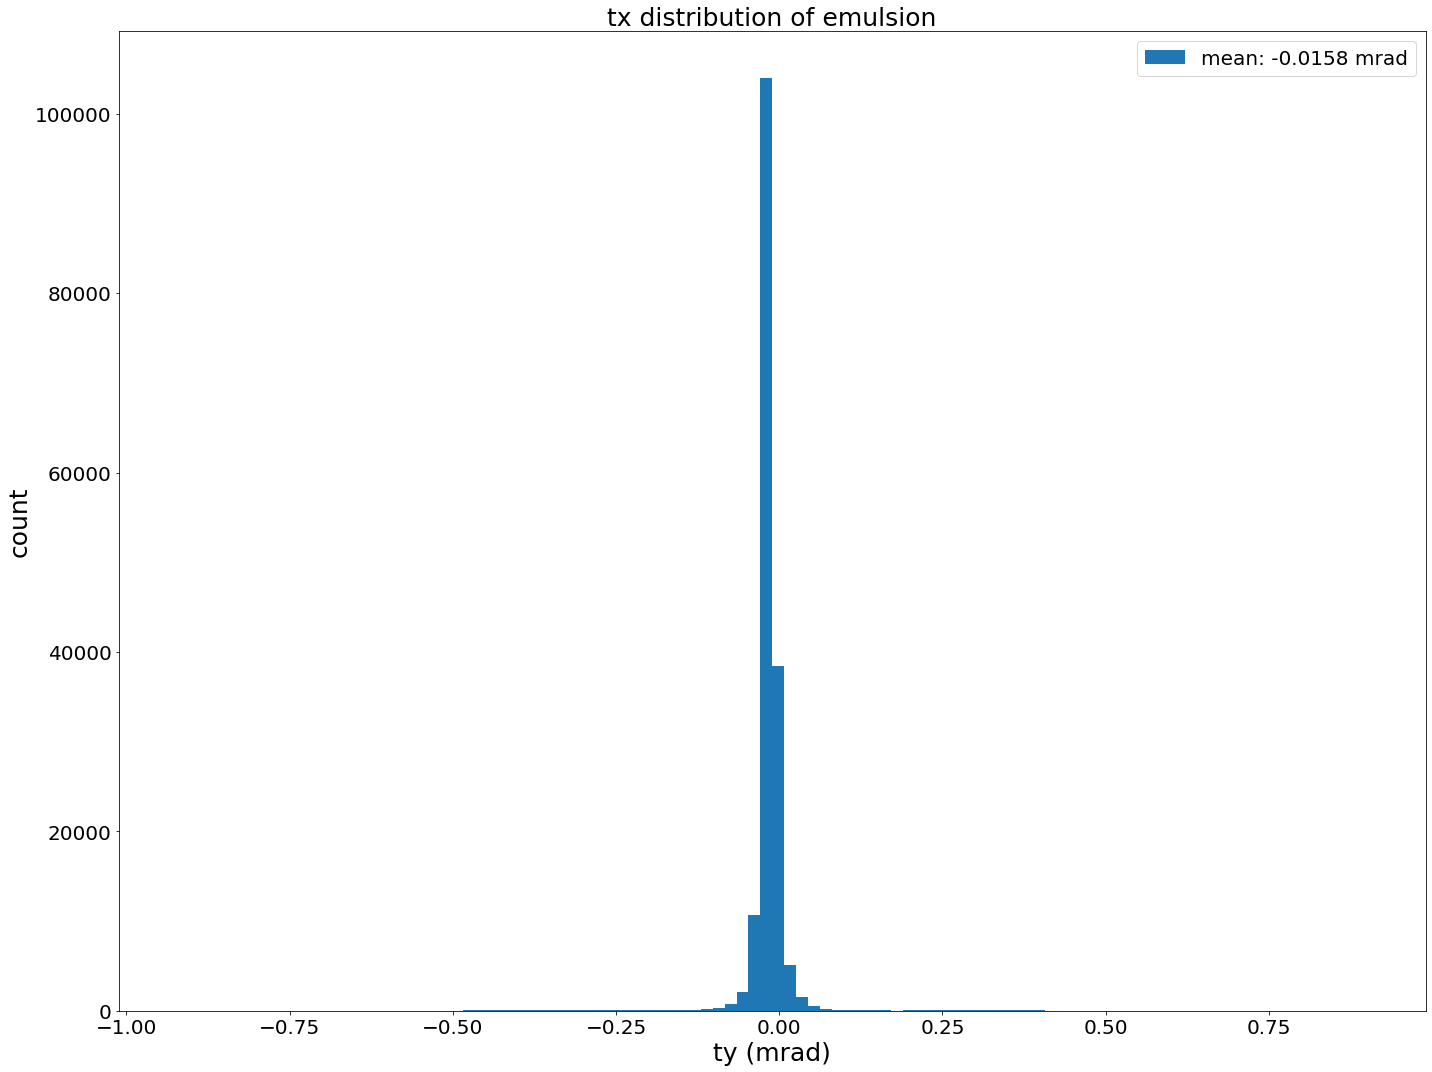

In [22]:
fig = plt.figure(figsize=(20,15))
plt.hist(emulsion_20["ty_last"],bins=100,label="mean: " + str(np.round(np.mean(emulsion_20["ty_last"]),4)) + " mrad")
plt.title("tx distribution of emulsion",size=25)
plt.ylabel("count",size=25)
plt.xlabel("ty (mrad)",size=25)
#plt.xlim(130000,10000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
#plt.ylim(0, 100000)
file_name = 'report/ty.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')
